This report presents a comprehensive analysis of electronics store sales data spanning a 12-month period. The analysis delves into sales trends across months, product category performance, and the geographical distribution of customer orders.

In [91]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

Loading the files.

In [128]:
files = glob.glob('Sales_*_2019.csv') 
salesList = []
for file in files:
    data = pd.read_csv(file)
    salesList.append(data)
sales = pd.concat(salesList)

Exploring the dataframe.

In [144]:
print(sales.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address          City State  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001        Dallas    TX  
1             NaN                                   NaN           NaN   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215        Boston    MA  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   Los Angeles    CA  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   Los Angeles    CA  


In [8]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB
None


Cleaning the data.

In [58]:
sales['Order ID'] = sales['Order ID'].replace('Order ID', np.nan)
sales['Product'] = sales['Product'].replace('Product', np.nan)
sales['Quantity Ordered'] = sales['Quantity Ordered'].replace('Quantity Ordered', np.nan)
sales['Price Each'] = sales['Price Each'].replace('Price Each', np.nan)
sales['Order Date'] = sales['Order Date'].replace('Order Date', np.nan)
sales['Purchase Address'] = sales['Purchase Address'].replace('Purchase Address', np.nan)


In [60]:
sales = sales.dropna()

In [62]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

Investigate the Evolution of Sales Revenue Across Months.

In [63]:
sales['salesRevenue'] = sales['Quantity Ordered'] * sales['Price Each']

In [145]:
print(sales.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address          City State  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001        Dallas    TX  
1             NaN                                   NaN           NaN   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215        Boston    MA  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   Los Angeles    CA  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   Los Angeles    CA  


In [71]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%y %H:%M')

In [97]:
sales['months'] = sales['Order Date'].dt.month
SalesPerMonth = sales[['salesRevenue', 'months']].groupby('months').sum().reset_index()
print(SalesPerMonth)
print(SalesPerMonth.columns)


    months  salesRevenue
0        1    1822256.73
1        2    2202022.42
2        3    2807100.38
3        4    3390670.24
4        5    3152606.75
5        6    2577802.26
6        7    2647775.76
7        8    2244467.88
8        9    2097560.13
9       10    3736726.88
10      11    3199603.20
11      12    4613443.34
Index(['months', 'salesRevenue'], dtype='object')


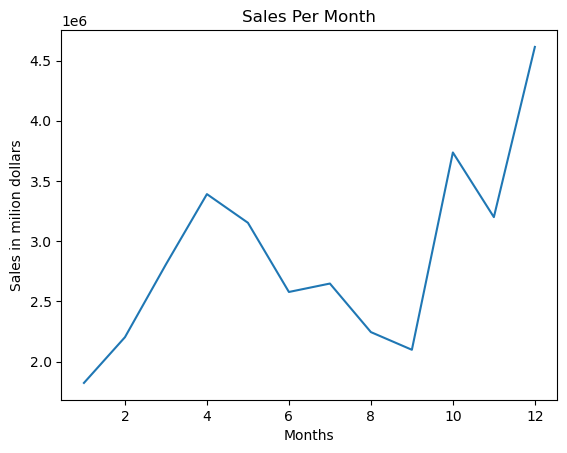

In [99]:
sns.lineplot(x = SalesPerMonth['months'], y = SalesPerMonth['salesRevenue'])
plt.xlabel('Months')
plt.ylabel('Sales in milion dollars')
plt.title('Sales Per Month')
plt.show()

Sales appear to be seasonal, with higher sales in the latter half of the year (around months 8 to 12) compared to the first half (around months 2 to 6).
The highest sales month appears to be month 12, with sales reaching around 4.5 million dollars.

Investigate Unit Sales by Product Category.

In [102]:
print(sales['Product'].unique())
print(sales['Product'].nunique())

['USB-C Charging Cable' 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor']
19


In [106]:
SoldProducts = sales[['Product', 'Quantity Ordered' ]].groupby('Product').sum().reset_index()
SoldProducts = SoldProducts.sort_values(by='Quantity Ordered')
print(SoldProducts)

                       Product  Quantity Ordered
10                    LG Dryer               646
11          LG Washing Machine               666
16             Vareebadd Phone              2068
0                 20in Monitor              4129
14             ThinkPad Laptop              4130
13          Macbook Pro Laptop              4728
8                Flatscreen TV              4819
9                 Google Phone              5532
3       34in Ultrawide Monitor              6199
1       27in 4K Gaming Monitor              6244
18                      iPhone              6849
2             27in FHD Monitor              7550
7   Bose SoundSport Headphones             13457
6     Apple Airpods Headphones             15661
17            Wired Headphones             20557
12    Lightning Charging Cable             23217
15        USB-C Charging Cable             23975
4        AA Batteries (4-pack)             27635
5       AAA Batteries (4-pack)             31017


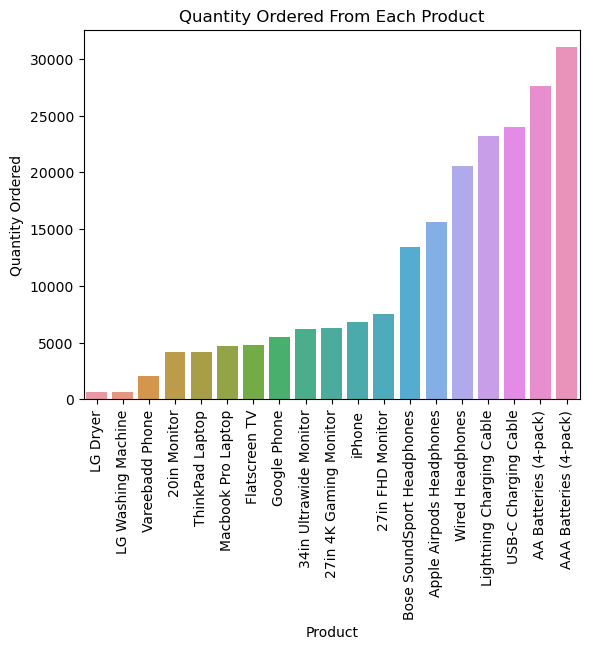

In [115]:
sns.barplot(x=SoldProducts['Product'], y=SoldProducts['Quantity Ordered'])
plt.xticks(rotation=90)
plt.title('Quantity Ordered From Each Product')
plt.show()

Our top-selling products are 'AAA Batteries (4-pack)' (31,017 units sold) and 'AA Batteries (4-pack)' (27,635 units sold).
Conversely, 'LG Dryer' (646 units) and 'LG Washing Machine' (666 units) experienced the lowest sales volume.

Investigate Revenue by Product Category.

In [107]:
revnuePerProduct = sales[['Product', 'salesRevenue']].groupby('Product').sum().reset_index()
revnuePerProduct = revnuePerProduct.sort_values(by='salesRevenue')
print(revnuePerProduct)

                       Product  salesRevenue
5       AAA Batteries (4-pack)      92740.83
4        AA Batteries (4-pack)     106118.40
17            Wired Headphones     246478.43
15        USB-C Charging Cable     286501.25
12    Lightning Charging Cable     347094.15
10                    LG Dryer     387600.00
11          LG Washing Machine     399600.00
0                 20in Monitor     454148.71
16             Vareebadd Phone     827200.00
2             27in FHD Monitor    1132424.50
7   Bose SoundSport Headphones    1345565.43
8                Flatscreen TV    1445700.00
6     Apple Airpods Headphones    2349150.00
3       34in Ultrawide Monitor    2355558.01
1       27in 4K Gaming Monitor    2435097.56
9                 Google Phone    3319200.00
14             ThinkPad Laptop    4129958.70
18                      iPhone    4794300.00
13          Macbook Pro Laptop    8037600.00


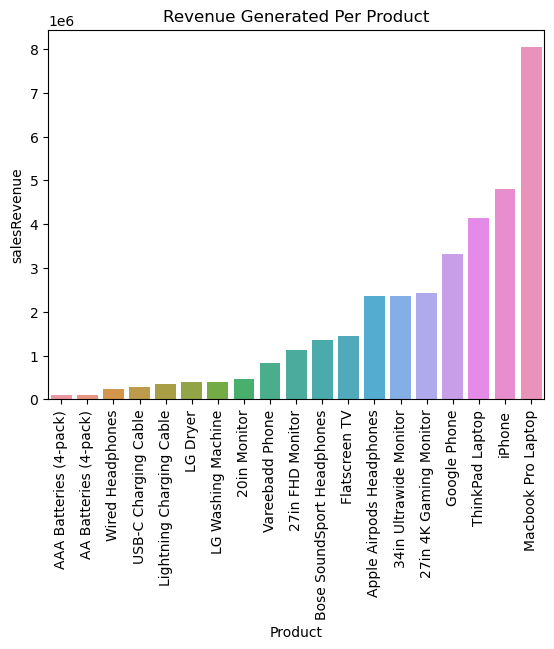

In [116]:
sns.barplot(x=revnuePerProduct['Product'], y=revnuePerProduct['salesRevenue'])
plt.xticks(rotation=90)
plt.title('Revenue Generated Per Product')
plt.show()

Our top revenue generators are iPhone ($4,794,300.00) and Macbook Pro Laptop ($8037600.00).
AAA Batteries (4-pack) and AA Batteries (4-pack) were our lowest performers, in terms of revenue generation, contributing $92,740.83 and $106,118.40 respectively.

Analyzing Geographical Distribution of Orders.

In [123]:
print(sales['Purchase Address'].unique())
print(sales['Purchase Address'].nunique())

['917 1st St, Dallas, TX 75001' '682 Chestnut St, Boston, MA 02215'
 '669 Spruce St, Los Angeles, CA 90001' ...
 '981 4th St, New York City, NY 10001'
 '840 Highland St, Los Angeles, CA 90001'
 '220 12th St, San Francisco, CA 94016']
140787


In [117]:
print(sales)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable                 2       11.95   
2       176559  Bose SoundSport Headphones                 1       99.99   
3       176560                Google Phone                 1      600.00   
4       176560            Wired Headphones                 1       11.99   
5       176561            Wired Headphones                 1       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)                 3        2.99   
11682   259354                      iPhone                 1      700.00   
11683   259355                      iPhone                 1      700.00   
11684   259356      34in Ultrawide Monitor                 1      379.99   
11685   259357        USB-C Charging Cable                 1       11.95   

               Order Date                         Purchase Address  \
0     2019-04-19 

In [130]:
ardesseSplit = sales['Purchase Address'].str.split(',', expand=True)
sales['City']= ardesseSplit[1]
State01 = ardesseSplit[2]
stateSplit = State01.str.split(' ', expand=True )
sales['State'] = stateSplit[1]
print(sales)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  \
0      04/19/19 08:46             917 1st St,

In [132]:
print(sales['City'].nunique())
print(sales['State'].nunique())

9
8


In [146]:
states = sales['State'].value_counts().reset_index()
print(states)

  State  count
0    CA  74337
1    NY  24876
2    TX  24725
3    MA  19934
4    GA  14881
5    WA  14732
6    OR  10010
7    ME   2455


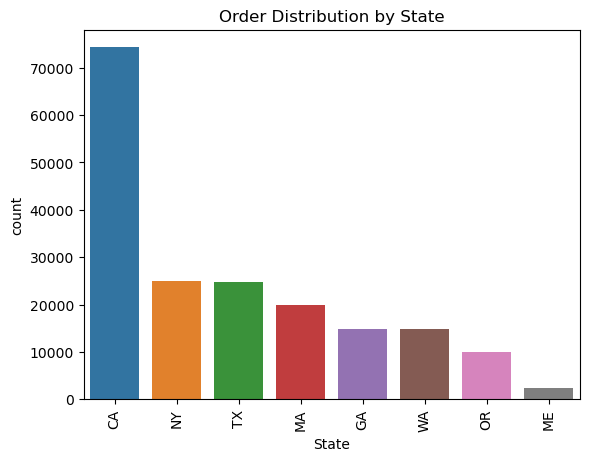

In [147]:
sns.barplot(x=states['State'], y=states['count'])
plt.xticks(rotation=90)
plt.title('Order Distribution by State')
plt.show()

Our sales data reveals a geographically diverse customer base, spanning eight distinct states. California emerges as the leading source of orders, contributing over 74,000. Notably, California's order volume significantly exceeds that of other states, which exhibit a more balanced distribution. Maine currently holds the position of the state with the fewest orders, at approximately 2,400.

In [138]:
cities = sales['City'].value_counts().reset_index()
print(cities)

             City  count
0   San Francisco  44732
1     Los Angeles  29605
2   New York City  24876
3          Boston  19934
4         Atlanta  14881
5          Dallas  14820
6         Seattle  14732
7        Portland  12465
8          Austin   9905


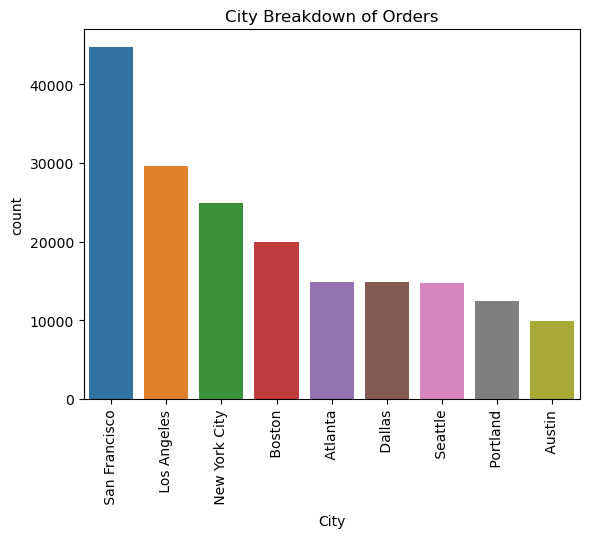

In [140]:
sns.barplot(x=cities['City'], y=cities['count'])
plt.xticks(rotation=90)
plt.title('City Breakdown of Orders')
plt.show()

We can confirm our previous conclusion: California Dominates Orders; the city of San Francisco has the most orders, at over 44,000. Los Angeles is the second-highest city in terms of orders.
The remaining six cities (New York City, Boston, Atlanta, Dallas, Seattle, and Portland) appear to have a more balanced distribution of orders, all seemingly falling within a range of 10,000 to 20,000 orders, suggesting a more geographically dispersed customer base beyond the West Coast. Austin appears to have a slightly lower order volume compared to the others.

# Sales Analysis Conclusion:

This sales data analysis paints a revealing picture of a company experiencing distinct seasonal trends, product category variations in performance, and a geographically diverse customer base.

Seasonality is a key factor, with sales demonstrably stronger in the latter half of the year (August to December). December emerges as the champion month, boasting revenue around $4.5 million. Understanding these seasonal patterns is crucial for informed inventory management, marketing strategies, and staffing decisions throughout the year.

Product category analysis delves deeper, revealing an interesting contrast. While AAA and AA batteries (4-pack) lead in unit sales (31,017 and 27,635 units respectively), they contribute minimally to overall revenue ($92,740.83 and $106,118.40). This suggests a focus on high-margin products like iPhones ($4,794,300.00) and Macbook Pro Laptops ($8,037,600.00) that translate to significantly higher revenue despite lower unit sales.  However, the high unit sales of batteries present a potential upsell opportunity by bundling them with electronics or offering them during peak sales periods.

The geographical distribution of orders paints a fascinating picture of a diverse customer base spanning eight states. California stands out as the undisputed leader, contributing over 74,000 orders – a number significantly exceeding other states.  Zooming in further, San Francisco reigns supreme within California with over 44,000 orders, followed by Los Angeles. This suggests a potential market saturation in California, particularly San Francisco.

The remaining six cities (New York City, Boston, Atlanta, Dallas, Seattle, and Portland) exhibit a more balanced distribution, with orders ranging from 10,000 to 20,000. This indicates a geographically dispersed customer base beyond the West Coast. Interestingly, Austin appears to have a slightly lower order volume compared to the others, presenting a potential market for further exploration and targeted marketing efforts.

In conclusion, this analysis reveals a company with promising aspects. The strong seasonal performance and geographically diverse customer base provide a solid foundation for growth. However, optimizing the product mix based on revenue contribution, exploring upsell opportunities for high-volume but low-margin items, and strategically targeting identified markets in cities like Austin can significantly enhance overall sales success.